In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
dataset = pd.read_csv('depression_data.csv')

In [5]:
dataset.head()

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


## 1. Data Cleaning

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10314 non-null  int64 
 1   message     10314 non-null  object
 2   label       10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [7]:
dataset.drop(dataset.columns[0], axis=1, inplace=True)

In [8]:
dataset.head()

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [9]:
dataset.rename(columns={'message' : 'text'}, inplace=True)
dataset.head()

,text,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [10]:
#missing values
dataset.isnull().sum()

text     0
label    0
dtype: int64

In [11]:
#duplicate values
dataset.duplicated().sum()

31

In [12]:
#removing duplicate values
dataset = dataset.drop_duplicates(keep='first')

In [13]:
dataset.duplicated().sum()

0

In [14]:
dataset.shape

(10283, 2)

## 2. EDA

In [15]:
dataset['label'].value_counts()

0    7996
1    2287
Name: label, dtype: int64

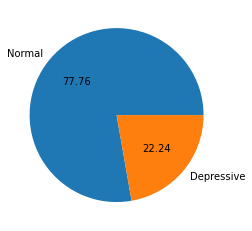

In [16]:
plt.pie(dataset['label'].value_counts(), labels=['Normal', 'Depressive'], autopct='%0.2f')
plt.show()

In [17]:
# Data is imbalanced

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [19]:
# Number of characters
dataset['num_characters'] = dataset['text'].apply(len)

In [20]:
dataset.sample(5)

,text,label,num_characters
322,@ashsimpsonwentz hey how are you?,0,34
6042,@azinkid Smart...and fashionable,0,33
8342,"@ravensspirit68 Me too, shortly. Only so much ...",1,80
9109,"A million memes a day,keep depression away.",1,43
3247,Just met my neighbor Cindy who told me that I ...,0,138


In [21]:
# Number of words
dataset['text'].apply(lambda x: nltk.word_tokenize(x))

0        [just, had, a, real, good, moment, ., i, misss...
1        [is, reading, manga, http, :, //plurk.com/p/mz...
2        [@, comeagainjen, http, :, //twitpic.com/2y2lx...
3        [@, lapcat, Need, to, send, 'em, to, my, accou...
4        [ADD, ME, ON, MYSPACE, !, !, !, myspace.com/Lo...
                               ...                        
10309    [No, Depression, by, G, Herbo, is, my, mood, f...
10310    [What, do, you, do, when, depression, succumbs...
10311    [Ketamine, Nasal, Spray, Shows, Promise, Again...
10312    [dont, mistake, a, bad, day, with, depression,...
10313                                                  [0]
Name: text, Length: 10283, dtype: object

In [22]:
dataset['num_words'] = dataset['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
dataset.head()

,text,label,num_characters,num_words
0,just had a real good moment. i missssssssss hi...,0,57,13
1,is reading manga http://plurk.com/p/mzp1e,0,42,6
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,84,11
3,@lapcat Need to send 'em to my accountant tomo...,0,135,29
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,45,8


In [24]:
# Number of sentences
dataset['text'].apply(lambda x: nltk.sent_tokenize(x))

0        [just had a real good moment., i missssssssss ...
1             [is reading manga  http://plurk.com/p/mzp1e]
2        [@comeagainjen http://twitpic.com/2y2lx - http...
3        [@lapcat Need to send 'em to my accountant tom...
4          [ADD ME ON MYSPACE!!!, myspace.com/LookThunder]
                               ...                        
10309    [No Depression by G Herbo is my mood from now ...
10310    [What do you do when depression succumbs the b...
10311    [Ketamine Nasal Spray Shows Promise Against De...
10312    [dont mistake a bad day with depression!, ever...
10313                                                  [0]
Name: text, Length: 10283, dtype: object

In [25]:
dataset['num_sentences'] = dataset['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
dataset.sample(5)

,text,label,num_characters,num_words,num_sentences
2562,@joelhousman Lol! @sfeuer must have some cool ...,0,58,11,2
763,@snedwan Good luck for today - have fun and d...,0,61,15,1
9715,@talfrb Because it stops .y depression,1,38,7,1
2803,"Oh hai, LA, you're just as overcast as Boston....",0,66,17,1
5185,@freaky_curves funny,0,21,3,1


In [27]:
dataset[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,10283.000000,10283.000000,10283.000000
mean,92.632889,18.956919,1.754546
std,64.688359,12.492378,1.027083
min,1.000000,1.000000,1.000000
25%,48.000000,10.000000,1.000000
50%,78.000000,16.000000,1.000000
75%,119.000000,25.000000,2.000000
max,874.000000,148.000000,17.000000


In [28]:
# Normal Tweets
dataset[dataset['label'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,7996.000000,7996.000000,7996.000000
mean,73.579290,16.163832,1.736368
std,35.860334,8.540448,0.967920
min,8.000000,1.000000,1.000000
25%,44.000000,9.000000,1.000000
50%,69.000000,15.000000,1.000000
75%,102.000000,22.000000,2.000000
max,232.000000,98.000000,17.000000


In [29]:
# Depressive Tweets
dataset[dataset['label'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2287.000000,2287.000000,2287.000000
mean,159.249672,28.722344,1.818102
std,92.813769,18.003823,1.209530
min,1.000000,1.000000,1.000000
25%,87.000000,15.000000,1.000000
50%,139.000000,24.000000,1.000000
75%,232.000000,41.000000,2.000000
max,874.000000,148.000000,10.000000


In [30]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

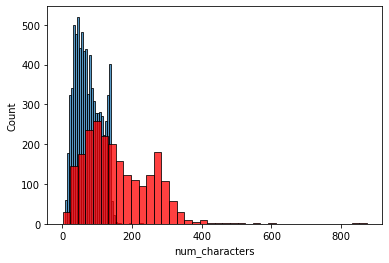

In [31]:
sns.histplot(dataset[dataset['label'] == 0]['num_characters'])
sns.histplot(dataset[dataset['label'] == 1]['num_characters'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

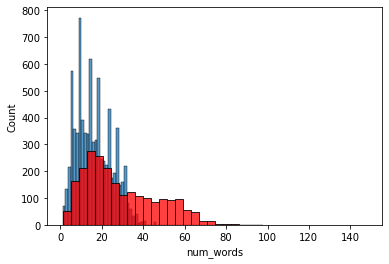

In [32]:
sns.histplot(dataset[dataset['label'] == 0]['num_words'])
sns.histplot(dataset[dataset['label'] == 1]['num_words'], color='red')

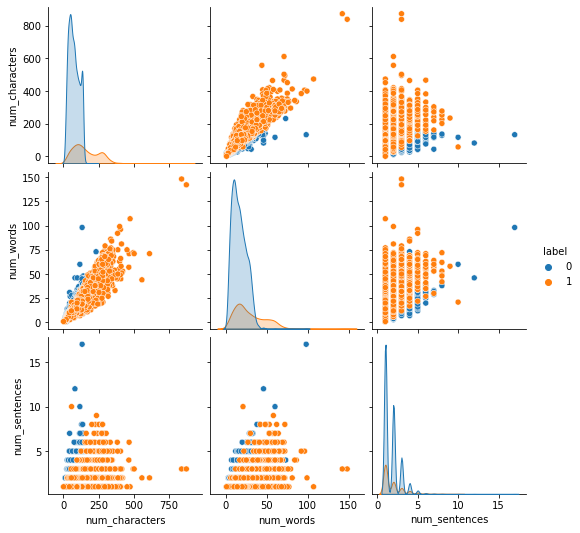

In [33]:
sns.pairplot(dataset,hue='label')

<AxesSubplot:>

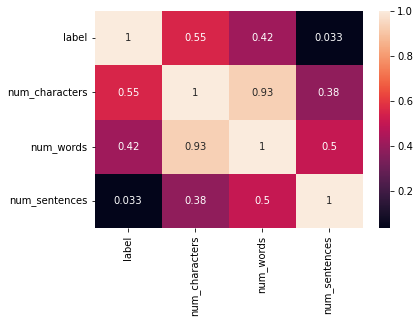

In [34]:
sns.heatmap(dataset.corr(), annot=True)

## 3. Data Preprocessing

*   Lower Case
*   Removing special characters
*   Removing stopwords and punctuations
*   Stemming





In [35]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [36]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [37]:
def preprocess_text(text):
  text = re.sub(r"@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]|\b\S+\.\S+\b", ' ', text)

  text = text.lower()
  text = text.split()
  ps = PorterStemmer()
  exclude_words = ["not", "won't", "shouldn't", "couldn't", "haven't", "can't", "aren't", "isn't", "don't", "doesn't", "hasn't", "hadn't", "mightn't", "mustn't", "needn't", "shan't", "wasn't", "weren't", "wouldn't"]
  all_stopwords = stopwords.words('english')
  all_stopwords = [word for word in all_stopwords if word not in exclude_words]
  text = [ps.stem(word) for word in text if not word in set(all_stopwords)]

  return ' '.join(text)

In [38]:
preprocess_text(dataset['text'][1])

'read manga'

In [39]:
dataset['text'][1]

'is reading manga  http://plurk.com/p/mzp1e'

In [40]:
dataset['transformed_text'] = dataset['text'].apply(preprocess_text)

In [41]:
dataset['transformed_text']

0                       real good moment missssssssss much
1                                               read manga
2                                                         
3        need send em account tomorrow oddli even refer...
4                                               add myspac
                               ...                        
10309        depress g herbo mood done stress peopl deserv
10310    depress succumb brain make feel like never enough
10311    ketamin nasal spray show promis depress suicid...
10312               dont mistak bad day depress everyon em
10313                                                    0
Name: transformed_text, Length: 10283, dtype: object

In [42]:
dataset[['text', 'label', 'transformed_text']].sample(5)

,text,label,transformed_text
616,@revstacey I don't know your number!,0,know number
5229,"@BigSyke69 lol yea 2ish sounds about right, i ...",0,lol yea 2ish sound right love sleep would get ...
2813,@snedwan Cheers #followfriday and good luck on...,0,cheer followfriday good luck run
198,@MichaelTyler in most ways at least at thi...,0,way least rate though may even bake someth ton...
9099,My mom told me about her depression and how sh...,1,mom told depress start cut told issu not ed to...


### WordCloud Visualization

In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=1200,height=800,min_font_size=10)

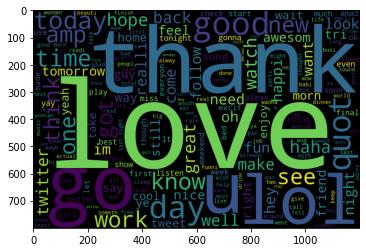

In [44]:
# Normal Tweets
normal_wc = wc.generate(dataset[dataset['label'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(normal_wc)

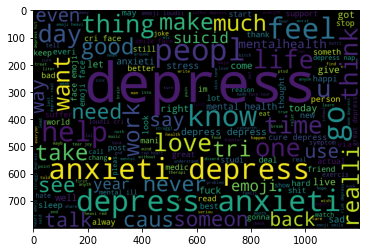

In [45]:
# Depressive Tweets
depress_wc = wc.generate(dataset[dataset['label'] == 1]['transformed_text'].str.cat(sep=" "))
plt.imshow(depress_wc)

In [46]:
normal_corpus = []
for msg in dataset[dataset['label'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    normal_corpus.append(word)

In [47]:
len(normal_corpus)

54887

In [48]:
from collections import Counter
df1 = pd.DataFrame(Counter(normal_corpus).most_common(30))

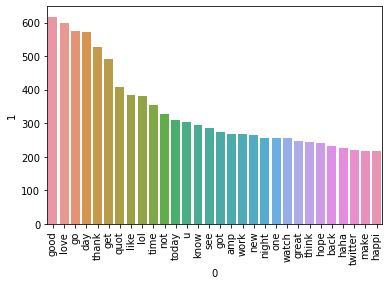

In [49]:
sns.barplot(x=df1[0], y=df1[1])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
depress_corpus = []
for msg in dataset[dataset['label'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    depress_corpus.append(word)

In [51]:
len(depress_corpus)

28953

In [52]:
df2 = pd.DataFrame(Counter(depress_corpus).most_common(30))

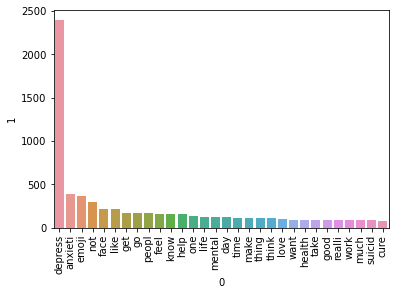

In [53]:
sns.barplot(x=df2[0],y=df2[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [54]:
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
# tfidf
tfidf = TfidfVectorizer()

In [55]:
dataset.isnull().sum()

text                0
label               0
num_characters      0
num_words           0
num_sentences       0
transformed_text    0
dtype: int64

In [56]:
X = tfidf.fit_transform(dataset['transformed_text']).toarray()

In [57]:
X.shape

(10283, 11870)

In [58]:
y = dataset['label'].values

In [59]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

### GaussianNB

In [63]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(f1_score(y_test, y_pred1))

0.5843461351482742
[[834 766]
 [ 89 368]]
0.4626021370207417


#### MultinomialNB

In [64]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(f1_score(y_test, y_pred2))

0.9227029654837141
[[1597    3]
 [ 156  301]]
0.7910643889618924


#### BernoulliNB

In [65]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(f1_score(y_test, y_pred3))

0.986387943607195
[[1597    3]
 [  25  432]]
0.968609865470852


In [66]:
# Tfidf -> BNB

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [68]:
svc = SVC(kernel='sigmoid', gamma=1.0)
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [69]:
clfs = {
    'SVC' : svc,
    'NB': bnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [70]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    f1_score_ = f1_score(y_test,y_pred)

    return accuracy,f1_score_

In [71]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9946524064171123, 0.9878453038674033)

In [72]:
accuracy_scores = []
f1_scores = []

for name,clf in clfs.items():

    current_accuracy,current_f1_score = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("F1_Score - ",current_f1_score)

    accuracy_scores.append(current_accuracy)
    f1_scores.append(current_f1_score)

For  SVC
Accuracy -  0.9946524064171123
F1_Score -  0.9878453038674033
For  NB
Accuracy -  0.986387943607195
F1_Score -  0.968609865470852
For  DT
Accuracy -  0.9951385512882839
F1_Score -  0.9889867841409692
For  LR
Accuracy -  0.9946524064171123
F1_Score -  0.9878453038674033
For  RF
Accuracy -  0.9965969859017987
F1_Score -  0.9922992299229924
For  AdaBoost
Accuracy -  0.9936801166747691
F1_Score -  0.9856985698569857
For  BgC
Accuracy -  0.9956246961594555
F1_Score -  0.9900771775082691
For  ETC
Accuracy -  0.9907632474477395
F1_Score -  0.9790055248618785
For  GBDT
Accuracy -  0.9956246961594555
F1_Score -  0.9900771775082691
For  xgb
Accuracy -  0.9951385512882839
F1_Score -  0.9889624724061811


In [73]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'F1_Score':f1_scores}).sort_values(by='F1_Score', ascending=False)

In [74]:
performance_df

,Algorithm,Accuracy,F1_Score
4,RF,0.996597,0.992299
6,BgC,0.995625,0.990077
8,GBDT,0.995625,0.990077
2,DT,0.995139,0.988987
9,xgb,0.995139,0.988962
0,SVC,0.994652,0.987845
3,LR,0.994652,0.987845
5,AdaBoost,0.993680,0.985699
7,ETC,0.990763,0.979006
1,NB,0.986388,0.968610


In [75]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [76]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.996597
1,BgC,Accuracy,0.995625
2,GBDT,Accuracy,0.995625
3,DT,Accuracy,0.995139
4,xgb,Accuracy,0.995139
5,SVC,Accuracy,0.994652
6,LR,Accuracy,0.994652
7,AdaBoost,Accuracy,0.993680
8,ETC,Accuracy,0.990763
9,NB,Accuracy,0.986388


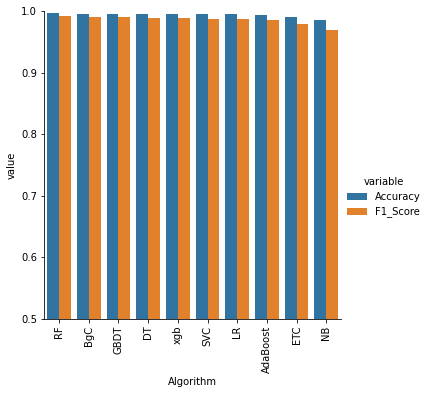

In [77]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [78]:
y_pred = rfc.predict(X_test)

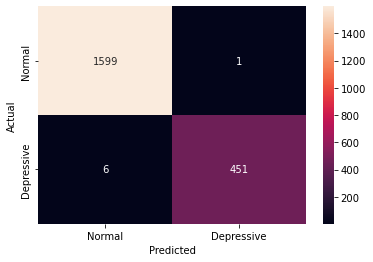

In [81]:
label_map = {0: 'Normal', 1: 'Depressive'}  # Map numeric labels to text
cm = confusion_matrix(y_test, y_pred, labels=list(label_map.keys()))  # Create confusion matrix directly with labels

sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()